In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
ds =  pd.read_csv('./Iris.csv')
ndarr = np.asarray(ds.values)
print ndarr.shape

(150, 6)


In [13]:
y_train = ndarr[:,-1]
x_train = ndarr[:,1:5]

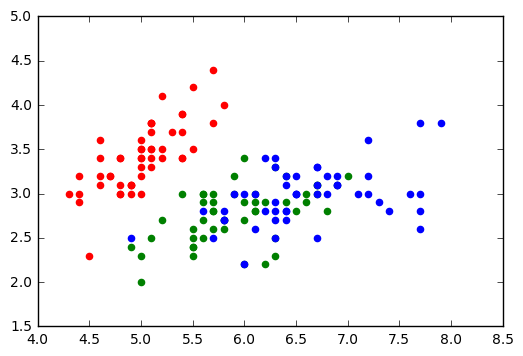

In [15]:
plt.figure(0)
for ix in range(ndarr.shape[0]):
    # red for setosa
    if ndarr[ix,-1] == 'Iris-setosa':
        plt.scatter(ndarr[ix,1],ndarr[ix,2],color='r')
    # green for versicolor
    elif ndarr[ix,-1] == 'Iris-versicolor':
        plt.scatter(ndarr[ix,1],ndarr[ix,2],color='g')
    # blue for -virginica
    else:
        plt.scatter(ndarr[ix,1],ndarr[ix,2],color='b')
plt.show()

In [64]:
def distance(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())


def knn(x_train,y_train,query,k=5):
    dist_val = list()
    
    for ix in range(x_train.shape[0]):
        dist_val.append([distance(query,x_train[ix,:]) ,y_train[ix]])
    
    sorted_dist = sorted(dist_val,key=lambda x:x[0])
    top_k = np.asarray(sorted_dist[:k])
    pred_arr = np.unique(top_k[:, 1], return_counts=True)
    return pred_arr

In [73]:
q = ndarr[100]
res = knn(x_train[:,:2],y_train[:],q[1:3],k=5)
print "Code Output    :" , res[0][res[1].argmax()]
print "Excepted Outpur:", q[-1]

Code Output    : Iris-virginica
Excepted Outpur: Iris-virginica
